In [5]:
from torch import nn, save, load
from torch.optim import Adam
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
from torchnn import ImageClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import torch
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import os

In [2]:
test = datasets.MNIST(root="data", download=True, train=False, transform=ToTensor())
test_loader = DataLoader(test, batch_size=1, shuffle=True)

clf = ImageClassifier()
clf.load_state_dict(load('model_state.pt'))
clf.eval()

/tmp/ipykernel_63788/253197441.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  clf.load_state_dict(load('model_state.pt'))


ImageClassifier(
  (model): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): LeakyReLU(negative_slope=0.01)
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (3): LeakyReLU(negative_slope=0.01)
    (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (5): LeakyReLU(negative_slope=0.01)
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=30976, out_features=10, bias=True)
  )
)

Model Accuracy: 98.77%


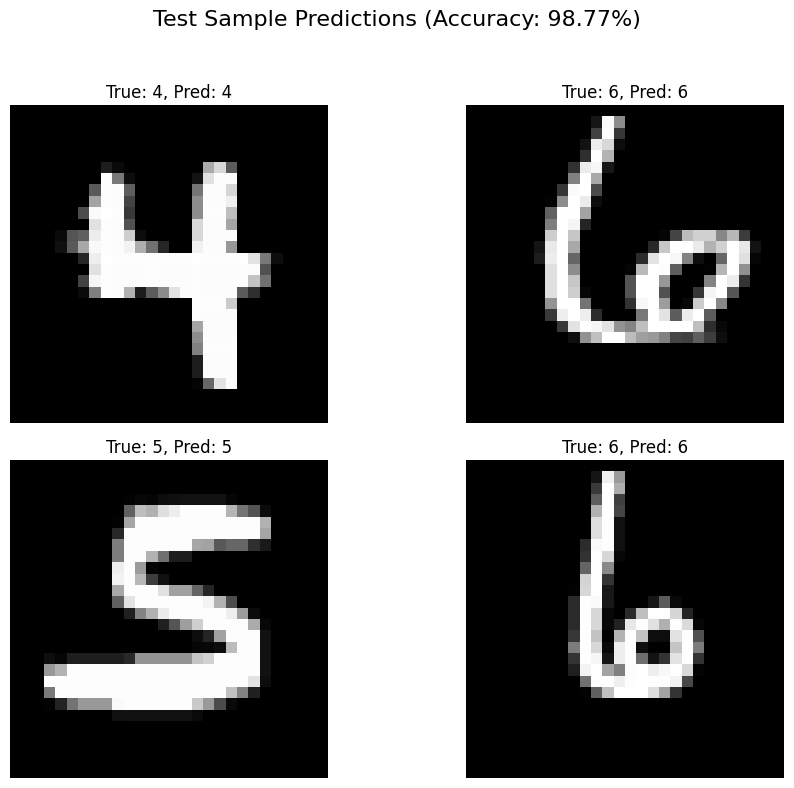

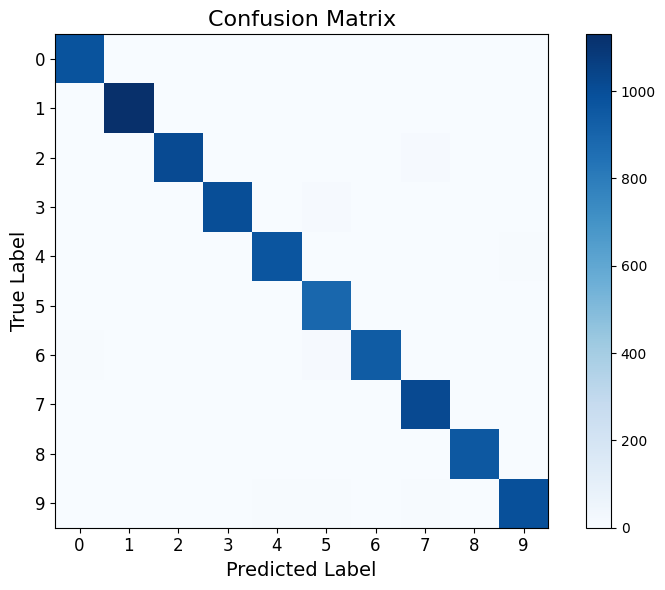

<Figure size 640x480 with 0 Axes>

In [6]:
output_dir = "results"
os.makedirs(output_dir, exist_ok=True)

# Calculate accuracy
accuracy = accuracy_score(all_labels, all_preds)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Visualize 4 test samples in a single figure
fig, axs = plt.subplots(2, 2, figsize=(10, 8))  # Create a 2x2 grid of subplots
fig.suptitle(f"Test Sample Predictions (Accuracy: {accuracy * 100:.2f}%)", fontsize=16)

examples = iter(test_loader)
for i, ax in enumerate(axs.flatten()):  # Flatten for easy iteration
    X, y = next(examples)
    with torch.no_grad():
        yhat = clf(X)
        predicted = torch.argmax(yhat, dim=1).item()
        true_label = y.item()

    # Display the image in the subplot
    ax.imshow(X[0].squeeze(0), cmap="gray")
    ax.set_title(f"True: {true_label}, Pred: {predicted}", fontsize=12)
    ax.axis("off")  # Remove axes for clarity

# Adjust layout and save the figure
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the title
output_dir = "output"  # Define the directory to save
os.makedirs(output_dir, exist_ok=True)
plt.savefig(os.path.join(output_dir, "test_sample_predictions.png"))
plt.show()







# Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title("Confusion Matrix", fontsize=16)
plt.colorbar()

# Add labels for the axes
plt.xticks(np.arange(10), [str(i) for i in range(10)], fontsize=12)
plt.yticks(np.arange(10), [str(i) for i in range(10)], fontsize=12)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)

# Optionally add gridlines for clarity
plt.grid(False)

plt.tight_layout()
plt.show()
plt.savefig(os.path.join(output_dir, "confusion_matrix.png"))

